<a href="https://colab.research.google.com/github/pinank0301/AI_Powered_Resume_Analyzer/blob/main/AI_Powered_Resume_Analysis_Using_Genetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 93.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Please upload your kaggle.json API key


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
  0% 0.00/383k [00:00<?, ?B/s]
100% 383k/383k [00:00<00:00, 688MB/s]
Archive:  resume-dataset.zip
  inflating: UpdatedResumeDataSet.csv  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset loaded. Number of resumes: 962
Accuracy: 0.96

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      0.40      0.57         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      0.92    

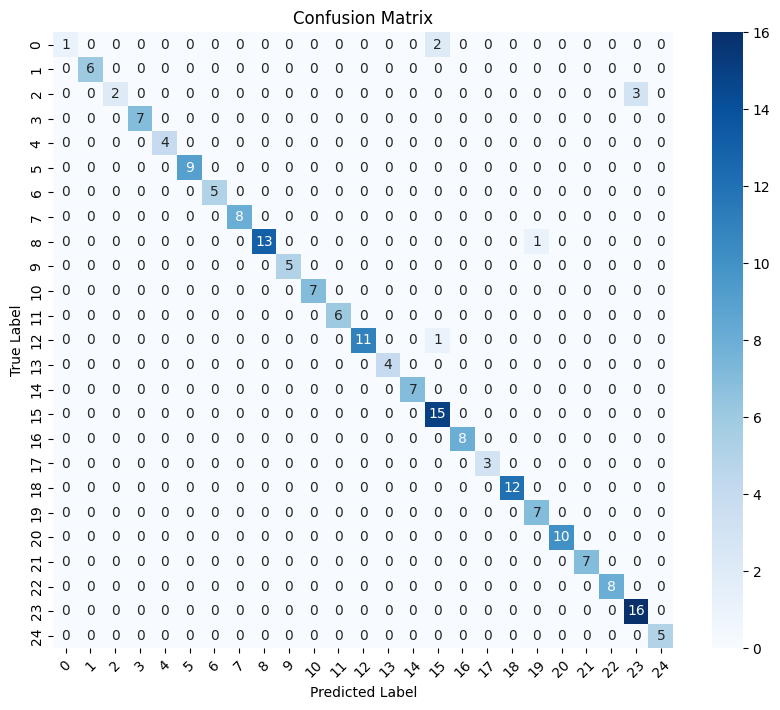

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Access your Streamlit app here: NgrokTunnel: "https://a925-34-106-162-171.ngrok-free.app" -> "http://localhost:8501"
Starting Streamlit app...



You can now view your Streamlit app in your browser.

Local URL: http://localhost:8501
Network URL: http://172.28.0.12:8501
External URL: http://34.106.162.171:8501



KeyboardInterrupt: 

In [ ]:
!pip install spacy nltk kaggle scikit-learn streamlit pyngrok matplotlib seaborn PyPDF2
!python -m spacy download en_core_web_sm

from google.colab import files
print("Please upload your kaggle.json API key")
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d gauravduttakiit/resume-dataset
!unzip resume-dataset.zip

import spacy
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st
from pyngrok import ngrok
import subprocess
import PyPDF2

nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm')

df = pd.read_csv('UpdatedResumeDataSet.csv')
print("Dataset loaded. Number of resumes:", len(df))

X_train, X_test, y_train, y_test = train_test_split(df['Resume'], df['Category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)
y_pred = classifier.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.show()

class ResumeAnalyzer:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')
        self.stop_words = set(stopwords.words('english'))
        self.job_roles = {
            'Data Scientist': {
                'skills': {'python', 'sql', 'machine learning', 'statistics',
                          'data visualization', 'tensorflow', 'pandas', 'numpy'},
                'min_experience_years': 3
            },
            'Software Engineer': {
                'skills': {'python', 'java', 'c++', 'javascript', 'sql',
                          'git', 'agile', 'docker'},
                'min_experience_years': 2
            },
            'Web Developer': {
                'skills': {'html', 'css', 'javascript', 'react', 'angular',
                          'node.js', 'sql'},
                'min_experience_years': 2
            }
        }

    def extract_text_from_pdf(self, pdf_file):
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text() or ""
        return text

    def extract_entities(self, text):
        doc = self.nlp(text)
        entities = {'PERSON': [], 'ORG': [], 'GPE': [], 'DATE': []}
        for ent in doc.ents:
            if ent.label_ in entities:
                entities[ent.label_].append(ent.text)
        return entities

    def extract_skills(self, text):
        doc = self.nlp(text.lower())
        skills = set()
        skill_patterns = {
            'python': r'python', 'java': r'java\b', 'c++': r'c\+\+', 'sql': r'sql\b',
            'mongo': r'mongo\w*', 'machine learning': r'machine learning',
            'deep learning': r'deep learning', 'agile': r'agile', 'javascript': r'javascript',
            'html': r'html\b', 'css': r'css\b', 'react': r'react', 'angular': r'angular',
            'node.js': r'node\.?js', 'aws': r'aws\b', 'docker': r'docker',
            'kubernetes': r'kubernetes', 'tensorflow': r'tensorflow', 'pytorch': r'pytorch',
            'git': r'git\b', 'statistics': r'statistics', 'data visualization': r'data visualization',
            'pandas': r'pandas', 'numpy': r'numpy', 'django': r'django', 'flask': r'flask'
        }
        for skill, pattern in skill_patterns.items():
            if re.search(pattern, text.lower()):
                skills.add(skill)
        return skills

    def extract_experience(self, text):
        experience = []
        lines = text.split('\n')
        current_exp = {}
        date_pattern = re.compile(r'(\w+\s+\d{4}\s*-\s*(?:Present|\w+\s+\d{4}|\d{4}))', re.IGNORECASE)
        title_company_pattern = re.compile(r'([^|]+)\s*\|\s*([^|]+?)\s*(?:\||$)', re.IGNORECASE)
        in_experience_section = False

        for i, line in enumerate(lines):
            line = line.strip()
            if not line:
                continue
            if re.search(r'Experience|Professional Experience', line, re.IGNORECASE):
                in_experience_section = True
                continue
            if in_experience_section and re.search(r'Education|Skills|Summary', line, re.IGNORECASE):
                in_experience_section = False
                if current_exp:
                    experience.append(current_exp)
                current_exp = {}
                continue
            if not in_experience_section:
                continue
            if '@' in line or re.match(r'\(\d{3}\)\s*\d{3}-\d{4}', line):
                continue
            date_match = date_pattern.search(line)
            if date_match:
                if current_exp:
                    experience.append(current_exp)
                current_exp = {'period': date_match.group(1)}
                title_company_match = title_company_pattern.search(line)
                if title_company_match:
                    current_exp['title'] = title_company_match.group(1).strip()
                    current_exp['company'] = title_company_match.group(2).strip()
            elif '|' in line:
                title_company_match = title_company_pattern.search(line)
                if title_company_match:
                    if current_exp:
                        experience.append(current_exp)
                    current_exp = {
                        'title': title_company_match.group(1).strip(),
                        'company': title_company_match.group(2).strip()
                    }
            elif line.startswith('-') and current_exp:
                if 'responsibilities' not in current_exp:
                    current_exp['responsibilities'] = []
                current_exp['responsibilities'].append(line[1:].strip())
        if current_exp and in_experience_section:
            experience.append(current_exp)
        return experience

    def extract_education(self, text):
        education = []
        lines = text.split('\n')
        edu_pattern = re.compile(r"(BS|B\.S\.|MS|M\.S\.|PhD|Bachelor'?s?|Master'?s?|\bB\.\w+\b|\bM\.\w+\b)\s+.*?(\d{4}\s*-\s*\d{4}|\d{4})",re.IGNORECASE)
        in_education_section = False
        for line in lines:
            line = line.strip()
            if not line:
                continue
            if 'Education' in line:
                in_education_section = True
                continue
            if in_education_section:
                edu_match = edu_pattern.search(line)
                if edu_match:
                    education.append(line)
                elif re.search(r'Skills|Experience|Summary', line, re.IGNORECASE):
                    in_education_section = False
        return education

    def calculate_experience_years(self, experience):
        total_years = 0
        for exp in experience:
            if 'period' not in exp:
                continue
            dates = exp['period'].split(' - ')
            if len(dates) == 2:
                try:
                    start = int(re.search(r'\d{4}', dates[0]).group())
                    end_str = dates[1].strip()
                    if end_str.lower() == 'present':
                        end = 2025
                    else:
                        end = int(re.search(r'\d{4}', end_str).group())
                    total_years += end - start
                except (ValueError, AttributeError):
                    continue
        return total_years

    def score_resume(self, analysis, job_role):
        if job_role not in self.job_roles:
            raise ValueError(f"Job role '{job_role}' not supported. Choose from {list(self.job_roles.keys())}")
        job_requirements = self.job_roles[job_role]
        score = 0
        required_skills = job_requirements['skills']
        found_skills = analysis['skills']
        skill_match = len(required_skills.intersection(found_skills))
        skill_score = (skill_match / len(required_skills)) * 50 if required_skills else 0
        score += skill_score
        exp_years = self.calculate_experience_years(analysis['experience'])
        exp_score = min((exp_years / job_requirements['min_experience_years']) * 40, 40) if exp_years > 0 else 0
        score += exp_score
        edu_score = 10 if analysis['education'] else 0
        score += edu_score
        missing_skills = required_skills - found_skills
        return {
            'total_score': round(score, 2),
            'skill_score': round(skill_score, 2),
            'experience_score': round(exp_score, 2),
            'education_score': edu_score,
            'missing_skills': missing_skills
        }

    def get_youtube_recommendations(self, missing_skills):
        recommendations = {}
        video_ids = {
            'python': [
                {'id': 'fLfuXDyVGG8', 'title': 'Python for Beginners - Learn Python in 1 Hour'},
                {'id': 'kqtD5dpn9C8', 'title': 'Python Tutorial for Beginners [Full Course]'},
                {'id': 'rfscVS0vtbw', 'title': 'Learn Python - Full Course for Beginners'}
            ],
            'sql': [
                {'id': 'kN1XP-Bef7w', 'title': 'SQL Tutorial for Beginners'},
                {'id': '7S_tz1z_5bA', 'title': 'SQL Full Course - SQL Tutorial For Beginners'},
                {'id': 'p3qvj9hO_Bo', 'title': 'Learn SQL in 1 Hour - SQL Basics'}
            ],
            'machine learning': [
                {'id': 'ukzFI9PXhRU', 'title': 'Machine Learning Tutorial for Beginners'},
                {'id': 'GJyWFJmd5Xo', 'title': 'Machine Learning Full Course'},
                {'id': 'xC-c7E5PK0Y', 'title': 'Introduction to Machine Learning'}
            ],
            'javascript': [
                {'id': 'PkZNo7MFNFg', 'title': 'JavaScript Tutorial for Beginners'},
                {'id': 'hdI2bqOjy3c', 'title': 'JavaScript Crash Course For Beginners'},
                {'id': 'jS4aFq5-91M', 'title': 'JavaScript Full Course'}
            ],
            'java': [
                {'id': 'WvGqWqO7E8w', 'title': 'Java Tutorial for Beginners'},
                {'id': 'eIrMbAQSU34', 'title': 'Java Full Course'},
                {'id': 'grEKMHGYyns', 'title': 'Learn Java in One Video'}
            ],
            'c++': [
                {'id': 'vLnPwxZdW4Y', 'title': 'C++ Tutorial for Beginners - Full Course'},
                {'id': '8jLOx1hD3_o', 'title': 'C++ Programming Course - Beginner to Advanced'},
                {'id': 'mUQZ1qmKlLY', 'title': 'Learn C++ in One Video'}
            ],
            'git': [
                {'id': 'SWYqp7iY_Tc', 'title': 'Git Tutorial for Beginners'},
                {'id': '8JJ101D3knE', 'title': 'Git and GitHub for Beginners'},
                {'id': 'RGOj5yH7evk', 'title': 'Git Full Course'}
            ],
            'html': [
                {'id': 'ok-plXXHlWw', 'title': 'HTML Tutorial for Beginners'},
                {'id': 'pQN-pnXPaVg', 'title': 'HTML Full Course - Build a Website'},
                {'id': 'qz0aGYrrlhU', 'title': 'Learn HTML in 1 Hour'}
            ],
            'css': [
                {'id': 'yfoY53QXEnI', 'title': 'CSS Tutorial - Zero to Hero'},
                {'id': '1Rs2NDWLC9Q', 'title': 'CSS Full Course for Beginners'},
                {'id': 'OXGznpKZ_sA', 'title': 'Learn CSS in 20 Minutes'}
            ],
            'react': [
                {'id': 'w7ejDZ8SWv8', 'title': 'React Tutorial for Beginners'},
                {'id': 'Ke90Tje7VS0', 'title': 'React JS Crash Course'},
                {'id': 'DLX62G4lc44', 'title': 'Learn React - Full Course'}
            ],
            'angular': [
                {'id': 'k5E2AVpwsko', 'title': 'Angular Tutorial for Beginners'},
                {'id': '2OHbjep_WjQ', 'title': 'Angular Crash Course'},
                {'id': 'RWi4R2wezW4', 'title': 'Learn Angular in 1 Hour'}
            ],
            'node.js': [
                {'id': 'fBNz5xF-KDg', 'title': 'Node.js Tutorial for Beginners'},
                {'id': 'TL1kpgSkzT0', 'title': 'Node.js Crash Course'},
                {'id': 'enopDSsibww', 'title': 'Learn Node.js - Full Tutorial'}
            ],
            'statistics': [
                {'id': 's6JpB0nMje0', 'title': 'Statistics for Beginners'},
                {'id': 'M94W2S56k78', 'title': 'Statistics Full Course'},
                {'id': 'XZo4xyJXCak', 'title': 'Introduction to Statistics'}
            ],
            'data visualization': [
                {'id': 'xEkIou3WIZw', 'title': 'Data Visualization Tutorial'},
                {'id': '5qg8M6Pa2v4', 'title': 'Data Visualization with Python'},
                {'id': '9D2aI30AMhY', 'title': 'Learn Data Visualization'}
            ],
            'tensorflow': [
                {'id': 'tPYj3fFJGjk', 'title': 'TensorFlow Tutorial for Beginners'},
                {'id': 'GJyWFJmd5Xo', 'title': 'TensorFlow Full Course'},
                {'id': 'CS4e2sT5h1A', 'title': 'Learn TensorFlow in 1 Hour'}
            ],
            'pandas': [
                {'id': 'vmEHCJofslg', 'title': 'Pandas Tutorial for Beginners'},
                {'id': 'ZyhVh-qRZPA', 'title': 'Pandas Full Course'},
                {'id': 'gfM0SasTdoc', 'title': 'Learn Pandas in 15 Minutes'}
            ],
            'numpy': [
                {'id': 'xECUrlnXCqk', 'title': 'NumPy Tutorial for Beginners'},
                {'id': 'ZB7BZMhf_Pk', 'title': 'NumPy Crash Course'},
                {'id': 'QUT1VHiLmmI', 'title': 'Learn NumPy - Full Tutorial'}
            ],
            'docker': [
                {'id': 'Gjnup-PuquQ', 'title': 'Docker Tutorial for Beginners'},
                {'id': '3c-iBn73dDE', 'title': 'Docker Full Course'},
                {'id': 'fQh1aXv2r1g', 'title': 'Learn Docker in 1 Hour'}
            ],
            'agile': [
                {'id': 'Z9QbYZh1YXY', 'title': 'Agile Methodology Tutorial'},
                {'id': 'i1Z8r2mZ2mI', 'title': 'Agile Crash Course'},
                {'id': '8hWufb0fO1Y', 'title': 'Introduction to Agile'}
            ],
            # Added missing skills
            'mongo': [
                {'id': 'bEusrD8g-dM', 'title': 'MongoDB Tutorial for Beginners'},
                {'id': 't8zFaRBfvOY', 'title': 'MongoDB Crash Course'},
                {'id': '5yTtt2e0PMA', 'title': 'Learn MongoDB in 1 Hour'}
            ],
            'deep learning': [
                {'id': 'aircAruvnKk', 'title': 'Deep Learning Tutorial for Beginners'},
                {'id': 'GJyWFJmd5Xo', 'title': 'Deep Learning Full Course'},
                {'id': 'QdxUXg5wD_4', 'title': 'Introduction to Deep Learning'}
            ],
            'aws': [
                {'id': 'SOTamWNgDKc', 'title': 'AWS Tutorial for Beginners'},
                {'id': 'k1RI5loc8_c', 'title': 'AWS Full Course'},
                {'id': 'Ixu0wu7Fd_c', 'title': 'Learn AWS in 1 Hour'}
            ],
            'kubernetes': [
                {'id': 's_o8dwzRlu4', 'title': 'Kubernetes Tutorial for Beginners'},
                {'id': 'X48VuDVv0do', 'title': 'Kubernetes Course'},
                {'id': 'fXh1kZmWIlk', 'title': 'Learn Kubernetes Basics'}
            ],
            'pytorch': [
                {'id': 'u7x8RXwLKcA', 'title': 'PyTorch Tutorial for Beginners'},
                {'id': '_H3aw6wkKnM', 'title': 'PyTorch Full Course'},
                {'id': 'niGdsCNUGs0', 'title': 'Learn PyTorch in 1 Hour'}
            ],
            'django': [
                {'id': 'rHux0gMZ3Eg', 'title': 'Django Tutorial for Beginners'},
                {'id': 'F5mRW0jo-U4', 'title': 'Django Crash Course'},
                {'id': 'Jamr5Na8w8Y', 'title': 'Learn Django - Full Tutorial'}
            ],
            'flask': [
                {'id': 'Z1RJmh_OqeA', 'title': 'Flask Tutorial for Beginners'},
                {'id': 'mqhxxeeTbu0', 'title': 'Flask Course - Python Web Development'},
                {'id': 'dam0GPOAvVI', 'title': 'Learn Flask in 1 Hour'}
            ]
        }
        for skill in missing_skills:
            skill_lower = skill.lower()
            videos = video_ids.get(skill_lower, [
                {'id': 'dQw4w9WgXcQ', 'title': 'General Programming Tutorial'},
                {'id': 'kqtD5dpn9C8', 'title': 'Learn to Code - Full Course'},
                {'id': 'rfscVS0vtbw', 'title': 'Programming for Beginners'}
            ])
            recommendations[skill] = []
            for video in videos:
                thumbnail_url = f"https://img.youtube.com/vi/{video['id']}/0.jpg"
                video_url = f"https://www.youtube.com/watch?v={video['id']}"
                recommendations[skill].append({
                    'thumbnail': thumbnail_url,
                    'url': video_url,
                    'title': video['title']
                })
        return recommendations

    def analyze(self, resume_text, job_role):
        analysis = {
            'entities': self.extract_entities(resume_text),
            'skills': self.extract_skills(resume_text),
            'experience': self.extract_experience(resume_text),
            'education': self.extract_education(resume_text)
        }
        scores = self.score_resume(analysis, job_role)
        recommendations = self.get_youtube_recommendations(scores['missing_skills'])
        required_skills = self.job_roles[job_role]['skills']
        found_skills = analysis['skills']
        skills_match_percent = (len(required_skills.intersection(found_skills)) / len(required_skills)) * 100
        return {
            'analysis': analysis,
            'scores': scores,
            'recommendations': recommendations,
            'skills_match_percent': skills_match_percent
        }

# Save Streamlit app with dark theme
with open("app.py", "w") as f:
    f.write('''
import spacy
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import PyPDF2

nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
df = pd.read_csv('UpdatedResumeDataSet.csv')
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['Resume'])
y = df['Category']
classifier = MultinomialNB()
classifier.fit(X, y)

class ResumeAnalyzer:
    def __init__(self):
        self.nlp = spacy.load('en_core_web_sm')
        self.stop_words = set(stopwords.words('english'))
        self.job_roles = {
            'Data Scientist': {
                'skills': {'python', 'sql', 'machine learning', 'statistics',
                          'data visualization', 'tensorflow', 'pandas', 'numpy'},
                'min_experience_years': 3
            },
            'Software Engineer': {
                'skills': {'python', 'java', 'c++', 'javascript', 'sql',
                          'git', 'agile', 'docker'},
                'min_experience_years': 2
            },
            'Web Developer': {
                'skills': {'html', 'css', 'javascript', 'react', 'angular',
                          'node.js', 'sql'},
                'min_experience_years': 2
            }
        }

    def extract_text_from_pdf(self, pdf_file):
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text() or ""
        return text

    def extract_entities(self, text):
        doc = self.nlp(text)
        entities = {'PERSON': [], 'ORG': [], 'GPE': [], 'DATE': []}
        for ent in doc.ents:
            if ent.label_ in entities:
                entities[ent.label_].append(ent.text)
        return entities

    def extract_skills(self, text):
        doc = self.nlp(text.lower())
        skills = set()
        skill_patterns = {
            'python': r'python', 'java': r'java\\b', 'c++': r'c\\+\\+', 'sql': r'sql\\b',
            'mongo': r'mongo\\w*', 'machine learning': r'machine learning',
            'deep learning': r'deep learning', 'agile': r'agile', 'javascript': r'javascript',
            'html': r'html\\b', 'css': r'css\\b', 'react': r'react', 'angular': r'angular',
            'node.js': r'node\\.?js', 'aws': r'aws\\b', 'docker': r'docker',
            'kubernetes': r'kubernetes', 'tensorflow': r'tensorflow', 'pytorch': r'pytorch',
            'git': r'git\\b', 'statistics': r'statistics', 'data visualization': r'data visualization',
            'pandas': r'pandas', 'numpy': r'numpy', 'django': r'django', 'flask': r'flask'
        }
        for skill, pattern in skill_patterns.items():
            if re.search(pattern, text.lower()):
                skills.add(skill)
        return skills

    def extract_experience(self, text):
        experience = []
        lines = text.split('\\n')
        current_exp = {}
        date_pattern = re.compile(r'(\\w+\\s+\\d{4}\\s*-\\s*(?:Present|\\w+\\s+\\d{4}|\\d{4}))', re.IGNORECASE)
        title_company_pattern = re.compile(r'([^|]+)\\s*\\|\\s*([^|]+?)\\s*(?:\\||$)', re.IGNORECASE)
        in_experience_section = False

        for i, line in enumerate(lines):
            line = line.strip()
            if not line:
                continue
            if re.search(r'Experience|Professional Experience', line, re.IGNORECASE):
                in_experience_section = True
                continue
            if in_experience_section and re.search(r'Education|Skills|Summary', line, re.IGNORECASE):
                in_experience_section = False
                if current_exp:
                    experience.append(current_exp)
                current_exp = {}
                continue
            if not in_experience_section:
                continue
            if '@' in line or re.match(r'\\(\\d{3}\\)\\s*\\d{3}-\\d{4}', line):
                continue
            date_match = date_pattern.search(line)
            if date_match:
                if current_exp:
                    experience.append(current_exp)
                current_exp = {'period': date_match.group(1)}
                title_company_match = title_company_pattern.search(line)
                if title_company_match:
                    current_exp['title'] = title_company_match.group(1).strip()
                    current_exp['company'] = title_company_match.group(2).strip()
            elif '|' in line:
                title_company_match = title_company_pattern.search(line)
                if title_company_match:
                    if current_exp:
                        experience.append(current_exp)
                    current_exp = {
                        'title': title_company_match.group(1).strip(),
                        'company': title_company_match.group(2).strip()
                    }
            elif line.startswith('-') and current_exp:
                if 'responsibilities' not in current_exp:
                    current_exp['responsibilities'] = []
                current_exp['responsibilities'].append(line[1:].strip())
        if current_exp and in_experience_section:
            experience.append(current_exp)
        return experience

    def extract_education(self, text):
        education = []
        lines = text.split('\\n')
        edu_pattern = re.compile(r"(BS|B\.S\.|MS|M\.S\.|PhD|Bachelor'?s?|Master'?s?|\\bB\.\\w+\\b|\\bM\.\\w+\\b)\s+.*?(\d{4}\s*-\s*\d{4}|\d{4})",re.IGNORECASE)
        in_education_section = False
        for line in lines:
            line = line.strip()
            if not line:
                continue
            if 'Education' in line:
                in_education_section = True
                continue
            if in_education_section:
                edu_match = edu_pattern.search(line)
                if edu_match:
                    education.append(line)
                elif re.search(r'Skills|Experience|Summary', line, re.IGNORECASE):
                    in_education_section = False
        return education

    def calculate_experience_years(self, experience):
        total_years = 0
        for exp in experience:
            if 'period' not in exp:
                continue
            dates = exp['period'].split(' - ')
            if len(dates) == 2:
                try:
                    start = int(re.search(r'\\d{4}', dates[0]).group())
                    end_str = dates[1].strip()
                    if end_str.lower() == 'present':
                        end = 2025
                    else:
                        end = int(re.search(r'\\d{4}', end_str).group())
                    total_years += end - start
                except (ValueError, AttributeError):
                    continue
        return total_years

    def score_resume(self, analysis, job_role):
        if job_role not in self.job_roles:
            raise ValueError(f"Job role '{job_role}' not supported. Choose from {list(self.job_roles.keys())}")
        job_requirements = self.job_roles[job_role]
        score = 0
        required_skills = job_requirements['skills']
        found_skills = analysis['skills']
        skill_match = len(required_skills.intersection(found_skills))
        skill_score = (skill_match / len(required_skills)) * 50 if required_skills else 0
        score += skill_score
        exp_years = self.calculate_experience_years(analysis['experience'])
        exp_score = min((exp_years / job_requirements['min_experience_years']) * 40, 40) if exp_years > 0 else 0
        score += exp_score
        edu_score = 10 if analysis['education'] else 0
        score += edu_score
        missing_skills = required_skills - found_skills
        return {
            'total_score': round(score, 2),
            'skill_score': round(skill_score, 2),
            'experience_score': round(exp_score, 2),
            'education_score': edu_score,
            'missing_skills': missing_skills
        }

    def get_youtube_recommendations(self, missing_skills):
        recommendations = {}
        video_ids = {
            'python': [
                {'id': 'fLfuXDyVGG8', 'title': 'Python for Beginners - Learn Python in 1 Hour'},
                {'id': 'kqtD5dpn9C8', 'title': 'Python Tutorial for Beginners [Full Course]'},
                {'id': 'rfscVS0vtbw', 'title': 'Learn Python - Full Course for Beginners'}
            ],
            'sql': [
                {'id': 'kN1XP-Bef7w', 'title': 'SQL Tutorial for Beginners'},
                {'id': '7S_tz1z_5bA', 'title': 'SQL Full Course - SQL Tutorial For Beginners'},
                {'id': 'p3qvj9hO_Bo', 'title': 'Learn SQL in 1 Hour - SQL Basics'}
            ],
            'machine learning': [
                {'id': 'ukzFI9PXhRU', 'title': 'Machine Learning Tutorial for Beginners'},
                {'id': 'GJyWFJmd5Xo', 'title': 'Machine Learning Full Course'},
                {'id': 'xC-c7E5PK0Y', 'title': 'Introduction to Machine Learning'}
            ],
            'javascript': [
                {'id': 'PkZNo7MFNFg', 'title': 'JavaScript Tutorial for Beginners'},
                {'id': 'hdI2bqOjy3c', 'title': 'JavaScript Crash Course For Beginners'},
                {'id': 'jS4aFq5-91M', 'title': 'JavaScript Full Course'}
            ],
            'java': [
                {'id': 'WvGqWqO7E8w', 'title': 'Java Tutorial for Beginners'},
                {'id': 'eIrMbAQSU34', 'title': 'Java Full Course'},
                {'id': 'grEKMHGYyns', 'title': 'Learn Java in One Video'}
            ],
            'c++': [
                {'id': 'vLnPwxZdW4Y', 'title': 'C++ Tutorial for Beginners - Full Course'},
                {'id': '8jLOx1hD3_o', 'title': 'C++ Programming Course - Beginner to Advanced'},
                {'id': 'mUQZ1qmKlLY', 'title': 'Learn C++ in One Video'}
            ],
            'git': [
                {'id': 'SWYqp7iY_Tc', 'title': 'Git Tutorial for Beginners'},
                {'id': '8JJ101D3knE', 'title': 'Git and GitHub for Beginners'},
                {'id': 'RGOj5yH7evk', 'title': 'Git Full Course'}
            ],
            'html': [
                {'id': 'ok-plXXHlWw', 'title': 'HTML Tutorial for Beginners'},
                {'id': 'pQN-pnXPaVg', 'title': 'HTML Full Course - Build a Website'},
                {'id': 'qz0aGYrrlhU', 'title': 'Learn HTML in 1 Hour'}
            ],
            'css': [
                {'id': 'yfoY53QXEnI', 'title': 'CSS Tutorial - Zero to Hero'},
                {'id': '1Rs2NDWLC9Q', 'title': 'CSS Full Course for Beginners'},
                {'id': 'OXGznpKZ_sA', 'title': 'Learn CSS in 20 Minutes'}
            ],
            'react': [
                {'id': 'w7ejDZ8SWv8', 'title': 'React Tutorial for Beginners'},
                {'id': 'Ke90Tje7VS0', 'title': 'React JS Crash Course'},
                {'id': 'DLX62G4lc44', 'title': 'Learn React - Full Course'}
            ],
            'angular': [
                {'id': 'k5E2AVpwsko', 'title': 'Angular Tutorial for Beginners'},
                {'id': '2OHbjep_WjQ', 'title': 'Angular Crash Course'},
                {'id': 'RWi4R2wezW4', 'title': 'Learn Angular in 1 Hour'}
            ],
            'node.js': [
                {'id': 'fBNz5xF-KDg', 'title': 'Node.js Tutorial for Beginners'},
                {'id': 'TL1kpgSkzT0', 'title': 'Node.js Crash Course'},
                {'id': 'enopDSsibww', 'title': 'Learn Node.js - Full Tutorial'}
            ],
            'statistics': [
                {'id': 's6JpB0nMje0', 'title': 'Statistics for Beginners'},
                {'id': 'M94W2S56k78', 'title': 'Statistics Full Course'},
                {'id': 'XZo4xyJXCak', 'title': 'Introduction to Statistics'}
            ],
            'data visualization': [
                {'id': 'xEkIou3WIZw', 'title': 'Data Visualization Tutorial'},
                {'id': '5qg8M6Pa2v4', 'title': 'Data Visualization with Python'},
                {'id': '9D2aI30AMhY', 'title': 'Learn Data Visualization'}
            ],
            'tensorflow': [
                {'id': 'tPYj3fFJGjk', 'title': 'TensorFlow Tutorial for Beginners'},
                {'id': 'GJyWFJmd5Xo', 'title': 'TensorFlow Full Course'},
                {'id': 'CS4e2sT5h1A', 'title': 'Learn TensorFlow in 1 Hour'}
            ],
            'pandas': [
                {'id': 'vmEHCJofslg', 'title': 'Pandas Tutorial for Beginners'},
                {'id': 'ZyhVh-qRZPA', 'title': 'Pandas Full Course'},
                {'id': 'gfM0SasTdoc', 'title': 'Learn Pandas in 15 Minutes'}
            ],
            'numpy': [
                {'id': 'xECUrlnXCqk', 'title': 'NumPy Tutorial for Beginners'},
                {'id': 'ZB7BZMhf_Pk', 'title': 'NumPy Crash Course'},
                {'id': 'QUT1VHiLmmI', 'title': 'Learn NumPy - Full Tutorial'}
            ],
            'docker': [
                {'id': 'Gjnup-PuquQ', 'title': 'Docker Tutorial for Beginners'},
                {'id': '3c-iBn73dDE', 'title': 'Docker Full Course'},
                {'id': 'fQh1aXv2r1g', 'title': 'Learn Docker in 1 Hour'}
            ],
            'agile': [
                {'id': 'Z9QbYZh1YXY', 'title': 'Agile Methodology Tutorial'},
                {'id': 'i1Z8r2mZ2mI', 'title': 'Agile Crash Course'},
                {'id': '8hWufb0fO1Y', 'title': 'Introduction to Agile'}
            ],
            'mongo': [
                {'id': 'bEusrD8g-dM', 'title': 'MongoDB Tutorial for Beginners'},
                {'id': 't8zFaRBfvOY', 'title': 'MongoDB Crash Course'},
                {'id': '5yTtt2e0PMA', 'title': 'Learn MongoDB in 1 Hour'}
            ],
            'deep learning': [
                {'id': 'aircAruvnKk', 'title': 'Deep Learning Tutorial for Beginners'},
                {'id': 'GJyWFJmd5Xo', 'title': 'Deep Learning Full Course'},
                {'id': 'QdxUXg5wD_4', 'title': 'Introduction to Deep Learning'}
            ],
            'aws': [
                {'id': 'SOTamWNgDKc', 'title': 'AWS Tutorial for Beginners'},
                {'id': 'k1RI5loc8_c', 'title': 'AWS Full Course'},
                {'id': 'Ixu0wu7Fd_c', 'title': 'Learn AWS in 1 Hour'}
            ],
            'kubernetes': [
                {'id': 's_o8dwzRlu4', 'title': 'Kubernetes Tutorial for Beginners'},
                {'id': 'X48VuDVv0do', 'title': 'Kubernetes Course'},
                {'id': 'fXh1kZmWIlk', 'title': 'Learn Kubernetes Basics'}
            ],
            'pytorch': [
                {'id': 'u7x8RXwLKcA', 'title': 'PyTorch Tutorial for Beginners'},
                {'id': '_H3aw6wkKnM', 'title': 'PyTorch Full Course'},
                {'id': 'niGdsCNUGs0', 'title': 'Learn PyTorch in 1 Hour'}
            ],
            'django': [
                {'id': 'rHux0gMZ3Eg', 'title': 'Django Tutorial for Beginners'},
                {'id': 'F5mRW0jo-U4', 'title': 'Django Crash Course'},
                {'id': 'Jamr5Na8w8Y', 'title': 'Learn Django - Full Tutorial'}
            ],
            'flask': [
                {'id': 'Z1RJmh_OqeA', 'title': 'Flask Tutorial for Beginners'},
                {'id': 'mqhxxeeTbu0', 'title': 'Flask Course - Python Web Development'},
                {'id': 'dam0GPOAvVI', 'title': 'Learn Flask in 1 Hour'}
            ]
        }
        for skill in missing_skills:
            skill_lower = skill.lower()
            videos = video_ids.get(skill_lower, [
                {'id': 'dQw4w9WgXcQ', 'title': 'General Programming Tutorial'},
                {'id': 'kqtD5dpn9C8', 'title': 'Learn to Code - Full Course'},
                {'id': 'rfscVS0vtbw', 'title': 'Programming for Beginners'}
            ])
            recommendations[skill] = []
            for video in videos:
                thumbnail_url = f"https://img.youtube.com/vi/{video['id']}/0.jpg"
                video_url = f"https://www.youtube.com/watch?v={video['id']}"
                recommendations[skill].append({
                    'thumbnail': thumbnail_url,
                    'url': video_url,
                    'title': video['title']
                })
        return recommendations

    def analyze(self, resume_text, job_role):
        analysis = {
            'entities': self.extract_entities(resume_text),
            'skills': self.extract_skills(resume_text),
            'experience': self.extract_experience(resume_text),
            'education': self.extract_education(resume_text)
        }
        scores = self.score_resume(analysis, job_role)
        recommendations = self.get_youtube_recommendations(scores['missing_skills'])
        required_skills = self.job_roles[job_role]['skills']
        found_skills = analysis['skills']
        skills_match_percent = (len(required_skills.intersection(found_skills)) / len(required_skills)) * 100
        return {
            'analysis': analysis,
            'scores': scores,
            'recommendations': recommendations,
            'skills_match_percent': skills_match_percent
        }

analyzer = ResumeAnalyzer()

def main():
    st.set_page_config(page_title="Resume Analyzer", layout="wide",
                      initial_sidebar_state="expanded",
                      page_icon="📄")

    st.markdown("""
        <style>
        :root {
            --primary-color: #FF4B4B;
            --background-color: #0E1117;
            --secondary-background-color: #1A1F2A;
            --text-color: #FAFAFA;
            --font: sans-serif;
        }
        body {
            color: var(--text-color);
            background-color: var(--background-color);
        }
        .stApp {
            background-color: var(--background-color);
            color: var(--text-color);
        }
        </style>
        """, unsafe_allow_html=True)

    st.title("Resume Analyzer")
    st.write("Upload your resume (TXT or PDF) and select a job role to get a detailed analysis.")

    uploaded_file = st.file_uploader("Upload your resume (txt or pdf file)", type=["txt", "pdf"])
    job_roles = list(analyzer.job_roles.keys())
    job_role = st.selectbox("Select the job role you're applying for:", job_roles)

    if uploaded_file is not None and job_role:
        if uploaded_file.type == "application/pdf":
            resume_text = analyzer.extract_text_from_pdf(uploaded_file)
        else:
            resume_text = uploaded_file.read().decode('utf-8', errors='ignore')

        resume_vector = vectorizer.transform([resume_text])
        predicted_category = classifier.predict(resume_vector)[0]
        st.write(f"**Predicted resume category based on training:** {predicted_category}")

        try:
            results = analyzer.analyze(resume_text, job_role)
            st.subheader(f"Analysis for {job_role} role:")

            st.write("### Scores")
            col1, col2 = st.columns(2)
            with col1:
                st.write(f"**Total Score:** {results['scores']['total_score']}/100")
                st.write(f"**Skill Score:** {results['scores']['skill_score']}/50")
            with col2:
                st.write(f"**Experience Score:** {results['scores']['experience_score']}/40")
                st.write(f"**Education Score:** {results['scores']['education_score']}/10")

            st.write("### Skills Match Visualization")
            fig, ax = plt.subplots(figsize=(8, 4))
            skills_data = [results['skills_match_percent'], 100 - results['skills_match_percent']]
            labels = ['Matching Skills', 'Missing Skills']
            colors = ['#4CAF50', '#FF4444']
            ax.pie(skills_data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
            ax.axis('equal')
            st.pyplot(fig)

            st.write("### Skills Found")
            skills = list(results['analysis']['skills']) if results['analysis']['skills'] else "No skills found"
            st.write(skills)

            st.write("### Missing Skills and Learning Recommendations")
            if results['recommendations']:
                for skill, recs in results['recommendations'].items():
                    st.write(f"**Skill:** {skill}")
                    cols = st.columns(min(len(recs), 3))
                    for idx, rec in enumerate(recs):
                        with cols[idx]:
                            st.image(rec['thumbnail'], width=150, caption=rec['title'])
                            st.markdown(f"[Watch Video]({rec['url']})")
                    st.write("---")
            else:
                st.write("No missing skills identified.")

            st.write("### Work Experience")
            if results['analysis']['experience']:
                for exp in results['analysis']['experience']:
                    st.write(f"**Title:** {exp.get('title', 'N/A')}")
                    st.write(f"**Company:** {exp.get('company', 'N/A')}")
                    st.write(f"**Period:** {exp.get('period', 'N/A')}")
                    if 'responsibilities' in exp:
                        st.write("**Responsibilities:**")
                        for resp in exp['responsibilities']:
                            st.write(f"- {resp}")
                    st.write("---")
            else:
                st.write("No work experience found.")

            st.write("### Education")
            if results['analysis']['education']:
                for edu in results['analysis']['education']:
                    st.write(f"- {edu}")
            else:
                st.write("No education details found.")

        except ValueError as e:
            st.error(f"Error: {e}")

if __name__ == "__main__":
    main()
''')

!ngrok authtoken 2ulkMWqFZDN4VQo96RfSgMaF0en_oANZ2KfYzRd5s7a7eXRC # Ngrok auth token
public_url = ngrok.connect(8501)
print(f"Access your Streamlit app here: {public_url}")

print("Starting Streamlit app...")
process = subprocess.Popen(
    ['streamlit', 'run', 'app.py', '--server.port', '8501', '--server.fileWatcherType', 'none'],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE
)

for line in process.stdout:
    print(line.decode().strip())